### Pet Project - Visualizing Iaito Order Details

## Data Visualization (Matplotlib & Seaborn) | by Author | Towards Data Science

### `Import libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import rectangle from matplotlib
from matplotlib.patches import Rectangle

In [2]:
# to see a list of plotting styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('default')
plt.style.use(['ggplot'])
#plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
%matplotlib inline

### `Import File`

In [4]:
# for reading .xlsx
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('Overview (Mastercopy) - 7May 2021.xlsx', sheet_name='Overview')

### `Data checks & processing`

In [5]:
df.head(2)

,Date,Total,Postage,Courier,Model,Sword total price,Model Price,"Length, blade\n(shaku-sun-bu)",weight (g),Blade length (addn charge),...,Kojiri,"Addn charge (Kojiri, Tsuba, etc.)",Tsuba,Tsuba weight(g),Saya,Saya charge,Sageo,Sageo silk charge,Bag charge,Koiguchi kun
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,...,No,0,T-44 Crescent Musashi,NaN,SY-03 Brown matt,0,Silk,5200,0,0
1,2014-11-01,100040,6100,FedEx,Chuden-S,93940,63720,2-2-5,720-740,0,...,No,0,T-119 Toru Taketora,90.0,SY-16 Brown Tataki,16200,Silk,5400,4300,0


In [6]:
df.shape

(39, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               39 non-null     datetime64[ns]
 1   Total                              39 non-null     int64         
 2   Postage                            39 non-null     int64         
 3   Courier                            39 non-null     object        
 4   Model                              39 non-null     object        
 5   Sword total price                  39 non-null     int64         
 6   Model Price                        39 non-null     int64         
 7   Length, blade
(shaku-sun-bu)       39 non-null     object        
 8   weight (g)                         39 non-null     object        
 9   Blade length (addn charge)         39 non-null     int64         
 10  Toushin                            38 no

In [8]:
# setting data type
df.convert_dtypes().dtypes

Date                                 datetime64[ns]
Total                                         Int64
Postage                                       Int64
Courier                                      string
Model                                        string
Sword total price                             Int64
Model Price                                   Int64
Length, blade\n(shaku-sun-bu)                string
weight (g)                                   string
Blade length (addn charge)                    Int64
Toushin                                      string
Hi                                           string
Hi Addn charge                                Int64
Hamon                                        string
Hamon addn charge                             Int64
Habaki                                       string
Tsuka ito                                    string
Ito color                                    string
Length, Tsuka\n(Sun-bu)                      string
Ito wrap    

In [9]:
#strip leading & trailing whitespaces, convert to lower case & in-between whitespace to underscore
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.columns

Index(['date', 'total', 'postage', 'courier', 'model', 'sword_total_price',
       'model_price', 'length,_blade\n(shaku-sun-bu)', 'weight_(g)',
       'blade_length_(addn_charge)', 'toushin', 'hi', 'hi_addn_charge',
       'hamon', 'hamon_addn_charge', 'habaki', 'tsuka_ito', 'ito_color',
       'length,_tsuka\n(sun-bu)', 'ito_wrap', 'same', 'same_addn_charge',
       'menuki', 'fuchi/\nkashira', 'silver_koshirae(addn_charge)', 'kojiri',
       'addn_charge_(kojiri,_tsuba,_etc.)', 'tsuba', 'tsuba_weight(g)', 'saya',
       'saya_charge', 'sageo', 'sageo_silk_charge', 'bag_charge',
       'koiguchi_kun'],
      dtype='object')

In [10]:
# rename 'sword_total_price' to 'iaito_total_price'
df.rename(columns={
    'total':'nett',
    'sword_total_price':'iaito_total_price',
    'length,_blade\n(shaku-sun-bu)':'blade(shaku-sun-bu)',
    'blade_length_(addn_charge)':'blade_length(cost)',
    'hi_addn_charge':'hi(cost)',
    'hamon_addn_charge':'hamon(cost)',
    'length,_tsuka\n(sun-bu)':'tsuka(sun-bu)',
    'same_addn_charge':'same(cost)',
    'fuchi/\nkashira':'fuchi_kashira',
    'silver_koshirae(addn_charge)':'silver_koshirae(cost)',
    'addn_charge_(kojiri,_tsuba,_etc.)':'custom_design(cost)',
    'saya_charge':'saya(cost)',
    'sageo_silk_charge':'silk_sageo(cost)',
    'bag_charge':'bag(cost)'},inplace=True)

In [11]:
#Why is bag(cost) an object type?
df['bag(cost)'].value_counts()

4300    14
No      11
0       11
4800     2
4900     1
Name: bag(cost), dtype: int64

In [12]:
# Replace 'No' with '0'
df['bag(cost)'].replace(to_replace='No',value=0,inplace=True)
df['bag(cost)'].value_counts()

0       22
4300    14
4800     2
4900     1
Name: bag(cost), dtype: int64

In [13]:
# reset data type
df.convert_dtypes().dtypes

date                     datetime64[ns]
nett                              Int64
postage                           Int64
courier                          string
model                            string
iaito_total_price                 Int64
model_price                       Int64
blade(shaku-sun-bu)              string
weight_(g)                       string
blade_length(cost)                Int64
toushin                          string
hi                               string
hi(cost)                          Int64
hamon                            string
hamon(cost)                       Int64
habaki                           string
tsuka_ito                        string
ito_color                        string
tsuka(sun-bu)                    string
ito_wrap                         string
same                             string
same(cost)                        Int64
menuki                           string
fuchi_kashira                    string
silver_koshirae(cost)             Int64


In [14]:
df.head(2)

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),...,kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,...,No,0,T-44 Crescent Musashi,NaN,SY-03 Brown matt,0,Silk,5200,0,0
1,2014-11-01,100040,6100,FedEx,Chuden-S,93940,63720,2-2-5,720-740,0,...,No,0,T-119 Toru Taketora,90.0,SY-16 Brown Tataki,16200,Silk,5400,4300,0


In [15]:
df.describe()

,nett,postage,iaito_total_price,model_price,blade_length(cost),hi(cost),hamon(cost),same(cost),silver_koshirae(cost),custom_design(cost),tsuba_weight(g),saya(cost),silk_sageo(cost),bag(cost),koiguchi_kun
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000,39.000000,39.000000,39.000000,39.000000
mean,108419.410256,7091.717949,101327.692308,78473.846154,333.846154,1389.743590,554.871795,1610.256410,1348.717949,3373.333333,95.789474,7828.205128,3464.102564,1915.384615,592.307692
std,39021.521668,3925.676080,38800.697393,26224.369203,1000.475191,2397.673749,957.284734,1362.349919,8394.950606,5619.433074,16.946909,11841.098560,2626.533355,2211.636505,377.933867
min,47060.000000,2300.000000,40260.000000,37400.000000,0.000000,0.000000,0.000000,0.000000,-12000.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000
25%,79100.000000,6037.500000,72860.000000,63720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000,0.000000,700.000000
50%,99840.000000,6700.000000,93940.000000,63720.000000,0.000000,0.000000,0.000000,2160.000000,0.000000,0.000000,90.000000,0.000000,5400.000000,0.000000,700.000000
75%,132230.000000,6800.000000,125430.000000,95580.000000,0.000000,2700.000000,1080.000000,2160.000000,0.000000,5400.000000,100.000000,16200.000000,5400.000000,4300.000000,700.000000
max,208000.000000,22856.000000,205700.000000,137500.000000,3300.000000,5500.000000,2200.000000,5500.000000,48400.000000,17600.000000,150.000000,50600.000000,5500.000000,4900.000000,1400.000000



#### `Deal with Null values`


In [16]:
#option to display all columns
pd.set_option('display.max_columns', None)

# rows where any column value is null
df[df.isnull().any(axis=1)]

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,(Atukuchi usuba) Thick,Yes,0,HM-1 Gunome (Single),0,Brass,Silk,TS-03,7-7,Hineri-Maki,Black,2100,MY-23 Phoenix,KY-51 Moon&Ocean,0,No,0,T-44 Crescent Musashi,NaN,SY-03 Brown matt,0,Silk,5200,0,0
29,2019-03-01,47060,6800,FedEx,Shoden,40260,37400,2-3-0,860-880,0,NaN,Yes,0,NaN,0,NaN,NaN,NaN,7-5,NaN,Black,2160,NaN,NaN,0,No,0,T-4 Musashi,90.0,SY-01 Blackgloss,0,Cotton,0,0,700


In [17]:
# ito_wrap default is Hineri-Maki, remaining NaN replace with 'no_info'
df['ito_wrap'].fillna('Hineri-Maki',inplace=True)
#Hamon - replace with 'no_info'
df.fillna('no_info',inplace=True)


### `Toushin - infer value from existing data`

* The weight range provides an estimation of expected iaito weight. It is based on the combined weight of the balde, the tsuba and the tsuka.

In [18]:
df['toushin'].value_counts()

(Atukuchi usuba) Thick    27
(Usukuchi) Thin           11
no_info                    1
Name: toushin, dtype: int64

In [19]:
# Row where toushin info is lacking
df.loc[df['toushin'] == 'no_info']

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun
29,2019-03-01,47060,6800,FedEx,Shoden,40260,37400,2-3-0,860-880,0,no_info,Yes,0,no_info,0,no_info,no_info,no_info,7-5,Hineri-Maki,Black,2160,no_info,no_info,0,No,0,T-4 Musashi,90,SY-01 Blackgloss,0,Cotton,0,0,700


In [20]:
df_toushin = df[['toushin','weight_(g)']].copy()
df_toushin['min_weight'] = df_toushin['weight_(g)'].str[0:3]
df_toushin['min_weight'] = pd.to_numeric(df_toushin['min_weight'])

In [21]:
df['min_weight(g)'] = pd.to_numeric(df_toushin['min_weight'])
df.head(1)

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun,min_weight(g)
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,(Atukuchi usuba) Thick,Yes,0,HM-1 Gunome (Single),0,Brass,Silk,TS-03,7-7,Hineri-Maki,Black,2100,MY-23 Phoenix,KY-51 Moon&Ocean,0,No,0,T-44 Crescent Musashi,no_info,SY-03 Brown matt,0,Silk,5200,0,0,880


In [22]:
df_toushin.loc[df_toushin['min_weight']==860]

,toushin,weight_(g),min_weight
9,(Atukuchi usuba) Thick,860-890,860
10,(Atukuchi usuba) Thick,860-880,860
29,no_info,860-880,860


In [23]:
# replace no_info with (Atukuchi usuba) Thick
df.iloc[[29]] = df.iloc[[29]].replace(to_replace='no_info',value='(Atukuchi usuba) Thick')

In [24]:
df.head(1)

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun,min_weight(g)
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,(Atukuchi usuba) Thick,Yes,0,HM-1 Gunome (Single),0,Brass,Silk,TS-03,7-7,Hineri-Maki,Black,2100,MY-23 Phoenix,KY-51 Moon&Ocean,0,No,0,T-44 Crescent Musashi,no_info,SY-03 Brown matt,0,Silk,5200,0,0,880


In [25]:
df_blength = df['blade(shaku-sun-bu)'].str.split('-',expand=True)
df_tlength = df['tsuka(sun-bu)'].str.split('-',expand=True)

In [26]:
df_blength.rename(columns={
    0:'shaku',
    1:'sun',
    2:'bu'
},inplace=True)

df_tlength.rename(columns={
    0:'sun',
    1:'bu'
},inplace=True)

In [27]:
df_blength['shaku'] = pd.to_numeric(df_blength['shaku'])
df_blength['sun'] = pd.to_numeric(df_blength['sun'])
df_blength['bu'] = pd.to_numeric(df_blength['bu'])
df_tlength['sun'] = pd.to_numeric(df_tlength['sun'])
df_tlength['bu'] = pd.to_numeric(df_tlength['bu'])


In [28]:
df['blade(cm)'] = (df_blength['shaku']*303.3 + df_blength['sun']* 30.3 + df_blength['bu']*3.03)/10
df['tsuka(cm)'] = (df_tlength['sun']* 30.3 + df_tlength['bu']*3.03)/10

In [29]:
df.head(1)

,date,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun,min_weight(g),blade(cm),tsuka(cm)
0,2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,(Atukuchi usuba) Thick,Yes,0,HM-1 Gunome (Single),0,Brass,Silk,TS-03,7-7,Hineri-Maki,Black,2100,MY-23 Phoenix,KY-51 Moon&Ocean,0,No,0,T-44 Crescent Musashi,no_info,SY-03 Brown matt,0,Silk,5200,0,0,880,74.295,23.331


### `Save the cleaned data as separate file`

In [30]:
# writer from pandas
writer = pd.ExcelWriter('project_nanato2021.xlsx')
df.to_excel(writer, sheet_name='cleaned_data')
writer.save()

### `Exploratory Data Analysis`

In [31]:
# set index as Date
df.set_index('date', inplace=True)

In [32]:
df.head(1)

,nett,postage,courier,model,iaito_total_price,model_price,blade(shaku-sun-bu),weight_(g),blade_length(cost),toushin,hi,hi(cost),hamon,hamon(cost),habaki,tsuka_ito,ito_color,tsuka(sun-bu),ito_wrap,same,same(cost),menuki,fuchi_kashira,silver_koshirae(cost),kojiri,custom_design(cost),tsuba,tsuba_weight(g),saya,saya(cost),sageo,silk_sageo(cost),bag(cost),koiguchi_kun,min_weight(g),blade(cm),tsuka(cm)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-11-01,72375,6075,FedEx,Chuden-S,66300,59000,2-4-5,880-940,0,(Atukuchi usuba) Thick,Yes,0,HM-1 Gunome (Single),0,Brass,Silk,TS-03,7-7,Hineri-Maki,Black,2100,MY-23 Phoenix,KY-51 Moon&Ocean,0,No,0,T-44 Crescent Musashi,no_info,SY-03 Brown matt,0,Silk,5200,0,0,880,74.295,23.331


### `Iaito model distribution`


In [33]:
df['model'].value_counts()

Chuden-S              22
Okuden Shinkensaku    10
Okuden Nosyusaku       4
Chuden-M               2
Shoden                 1
Name: model, dtype: int64

Most people in dojo use Chuden iaito with silk tsuka.

### `Note: `
Plotting functions in seaborn are broadly divided into two classes

* "Axes-level" functions: regplot, boxplot, kdeplot, etc.

* "Figure-level" functions: relplot, catplot, displot, pairplot, jointplot, etc.

Axes-level will take an explicit `ax` argument and return an `Axes` object. Hence, a typical object-oriented style<br>
    
<code>
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)</code>

For the Figure-level functions, these need to have total control over the figure. Hence, need to pass a "figure-level" argument. An example would be adjusting the figure size via the `height` and `aspect`.

<code>
sns.catplot(data=df, x='x_variable', y='y_variable', 
hue='hue', height=8, aspect=12)
</code>

In [34]:
# create placeholder for fontsizing
# x & y label fontsize
xls = 14
yls = 14

# x & y tick fontsize
xts = 13
yts = 13

# title fontsize
ts = 15

# legend fontsize
ls = 13

* Use a pie chart to visualize model count distribution. In this context, a pie chart to visualize the distribution of the five models would not run the risk of being cluttered; hence is still suitable.<br> In pie chart, the `autopct` enables one to display the percent value using Python string formatting.



In [35]:
df_pie = df['model'].value_counts().to_frame()

In [36]:
df_pie = df_pie.rename(columns={'model':'count'})
df_pie

,count
Chuden-S,22
Okuden Shinkensaku,10
Okuden Nosyusaku,4
Chuden-M,2
Shoden,1


In [37]:
mod = [m for m in df_pie.index]
count = [c for c in df_pie['count']]

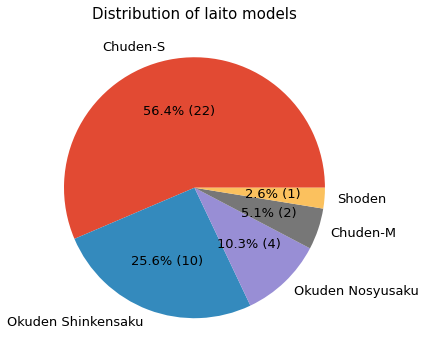

In [38]:
# Pie chart
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

def make_autopct(count):
    def my_autopct(pct):
        total = sum(count)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

ax = df_pie['count'].plot(kind='pie',fontsize=ls,autopct=make_autopct(count))
ax.set_ylabel("")
ax.set_title("Distribution of Iaito models",fontsize=ts)
plt.savefig('Pie_NO.png')
plt.show()

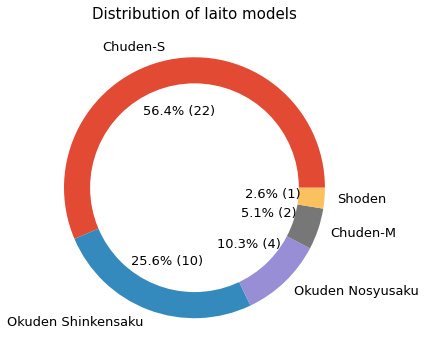

In [39]:
# Donut chart
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

def make_autopct(count):
    def my_autopct(pct):
        total = sum(count)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

ax = df_pie['count'].plot(kind='pie',fontsize=ls,autopct=make_autopct(count),
                         pctdistance=0.6)
ax.set_ylabel("")
ax.set_title("Distribution of Iaito models",fontsize=ts)

# Add a white circle to center of pie chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

Customize the color set for enhanced aesthetics. Three main types of color palette available:
* Qualitative
* Sequential
* Diverging

For the purpose of segregating the models, use sequential. For this purpose, the tool: Data color picker greatly facilitated the color selection. [Go to Data Color Picker Site](https://learnui.design/tools/data-color-picker.html#palette)

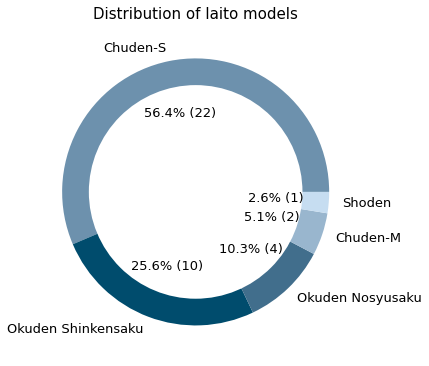

In [40]:
# Standarizing color scheme for the Iaito models
palette = ['#6d91ad','#004c6d','#416e8c','#99b6ce','#c6ddf1' ]

# Create the plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

def make_autopct(count):
    def my_autopct(pct):
        total = sum(count)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

ax = df_pie['count'].plot(kind='pie',fontsize=ls,autopct=make_autopct(count),
                         pctdistance=0.6, colors=palette)
ax.set_ylabel("")
ax.set_title("Distribution of Iaito models",fontsize=ts)

# Add a white circle to center of pie chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('Distribution of iaito model_pie.png')
plt.show()

In [41]:
df_bar=df_pie.copy()
df_bar.reset_index(inplace=True)
df_bar = df_bar.rename(columns={'index':'model','model':'count'})
df_bar

,model,count
0,Chuden-S,22
1,Okuden Shinkensaku,10
2,Okuden Nosyusaku,4
3,Chuden-M,2
4,Shoden,1


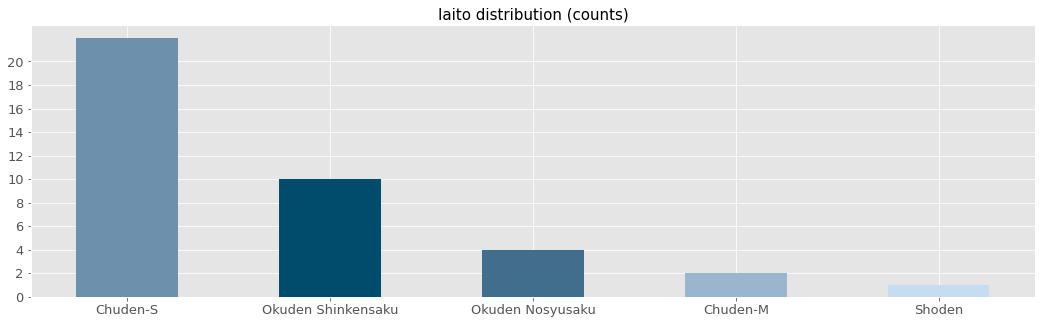

In [42]:
# Bar chart distribution of iaito count
fig, ax1 = plt.subplots(figsize=(18,5))

ax1.bar(x=df_bar['model'],
        height=df_bar['count'], width=0.5,
        color=palette)
plt.yticks(np.arange(0, 22,2),fontsize=yts)
plt.xticks(fontsize=xts)
plt.title('Iaito distribution (counts)',fontsize=ts)
plt.show()

### `Model Base Price`

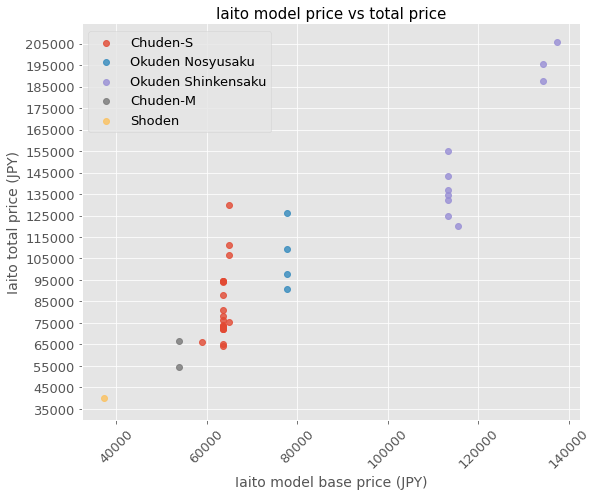

In [43]:
# Lmplot is a figure-level function plot
ax = sns.lmplot(x='model_price', y='iaito_total_price',data=df,
           fit_reg=False, #no regression line
           hue='model',height=7, aspect=1.2, legend=False,legend_out=False)
plt.title('Iaito model price vs total price', fontsize=ts)
plt.ylim(30000,None)
plt.yticks(np.arange(35000, 210000, step=10000), fontsize=yts)
plt.ylabel('Iaito total price (JPY)',fontsize=yls)
plt.xticks(rotation=45, fontsize=xts)
plt.xlabel('Iaito model base price (JPY)',fontsize=xls)
plt.legend(fontsize=ls)
plt.tight_layout()
plt.savefig('Base vs overall price by model.png')
plt.show()

* One may customize the seaborn color palette.

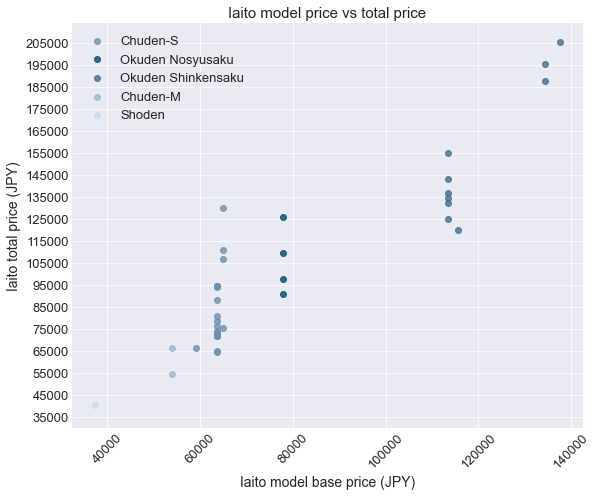

In [44]:
# Set your custom color palette
sns.set_palette(sns.color_palette(palette))
plt.style.use('seaborn-darkgrid')

# Lmplot is a figure-level function plot
ax = sns.lmplot(x='model_price', y='iaito_total_price',data=df,
           fit_reg=False, #no regression line
           hue='model',height=7, aspect=1.2, legend=False,legend_out=False)
plt.title('Iaito model price vs total price', fontsize=ts)
plt.ylim(30000,None)
plt.yticks(np.arange(35000, 210000, step=10000), fontsize=yts)
plt.ylabel('Iaito total price (JPY)',fontsize=yls)
plt.xticks(rotation=45, fontsize=xts)
plt.xlabel('Iaito model base price (JPY)',fontsize=xls)
plt.legend(fontsize=ls)
plt.tight_layout()
plt.savefig('Base vs overall price by model_Colorscheme.png')
plt.show()

Above plot provides a rough sense of the starting price for each iaito model class and their eventual total (overall) check-out price after customizations. Another way of visualizing the spread of the total price is through the boxplot.

In [45]:
# create a copy of the dataframe for boxplot use
df2 = df[['model','iaito_total_price','model_price']].copy()
df2.head()

,model,iaito_total_price,model_price
date,,,
2013-11-01,Chuden-S,66300,59000
2014-11-01,Chuden-S,93940,63720
2015-03-01,Chuden-S,73420,63720
2015-12-01,Chuden-S,76280,63720
2016-10-01,Chuden-S,94640,63720


We might be using a fair bit of categorical plotting later on. Prident to plan ahead and consider potential plots for experimentation, and methods to facilitate customization. The ordering of the models (categorical data type) can be done by creating a specific list as we shall do next.

In [46]:
#List categorical variables in correct order
col_lst = ['Shoden', 'Chuden-M', 'Chuden-S', 'Okuden Nosyusaku', 'Okuden Shinkensaku',]

#Assign the above list to category ranking
mod_type = pd.api.types.CategoricalDtype(ordered= True, categories=col_lst)

#Apply this to the specific column in DataFrame
df2['model'] = df2['model'].astype(mod_type)

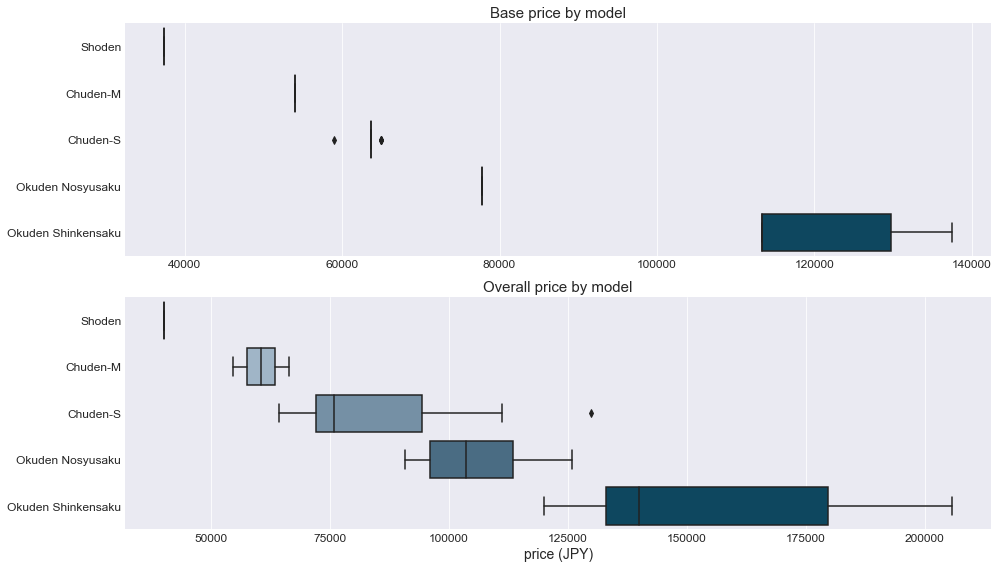

In [47]:
# boxplot, models are organised in ascending order
palette_box = ['#c6ddf1','#99b6ce','#6d91ad','#416e8c','#004c6d']

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,8), sharey=True)
sns.boxplot(data=df2, y='model', x='model_price',ax=ax1, palette=palette_box)
sns.boxplot(data=df2, y='model', x='iaito_total_price',ax=ax2, palette=palette_box)

ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('price (JPY)',fontsize = yls)
ax1.set_title('Base price by model', fontsize = ts)
ax2.set_title('Overall price by model', fontsize = ts)
ax1.tick_params(axis='x', labelsize='large')
ax1.tick_params(axis='y', labelsize='large')
ax2.tick_params(axis='x', labelsize='large')
ax2.tick_params(axis='y', labelsize='large')
plt.tight_layout()
plt.savefig('Base vs overall price_box_h.png')
plt.show()

Model base price is a strong influencer of overall total pricing. This is evidenced by the consistent ranked pattern between starting base price and overall base price. Are there any other factors that might strongly influence the overall price of a particular iaito? Let's see what we can find from correlation matrices.

In [48]:
# Create another dataframe, dropping the nett
df_stats = df.drop(['nett'],axis=1)

In [49]:
# function for heatmap
def hmap(input_map, cmap_choice, img_name):
    
    fig,ax = plt.subplots(1,1,figsize=(10,6))

    sns.heatmap(input_map.corr(),
                ax=ax,
                annot=True, fmt='.1g',
                vmin=-1, vmax=1, center=0,
                cmap=cmap_choice,
                mask = np.triu(df_stats.corr()))
    
    labels = list(df_stats.select_dtypes(include=[np.number]).columns.values)
    N = len(labels)
    target = 'iaito_total_price'
    index_target = labels.index(target)
    x, y, w, h = 0, index_target, N, 1
    #for _ in range(2):
    ax.add_patch(Rectangle((y, x), h, w, fill=False, edgecolor='crimson', lw=4, clip_on=False))
        #y, x = x, y # exchange the roles of x and y
        #h, w = w, h # exchange the roles of w and h
    plt.tight_layout()
    img_title = img_name + '_heatmap.png'
    plt.savefig(img_title)
    plt.show()

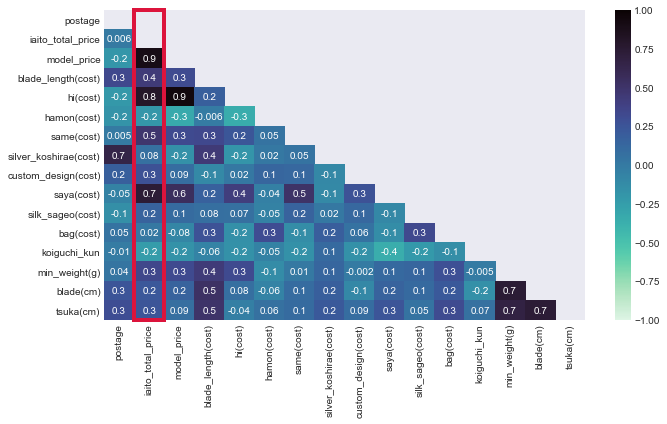

In [50]:
hmap(df_stats,'mako_r', 'all')


Model price, saya charge, hi charge are the general top contributions to overall pricing.
Let's delve a little deeper by looking at significant price components per model types.

In [51]:
df_stats['model'].unique()

array(['Chuden-S', 'Okuden Nosyusaku', 'Okuden Shinkensaku', 'Chuden-M',
       'Shoden'], dtype=object)

In [52]:
model_list = list(df_stats['model'].unique())
model_list

['Chuden-S', 'Okuden Nosyusaku', 'Okuden Shinkensaku', 'Chuden-M', 'Shoden']


#### Shoden & Chuden

In [53]:
# separate dataframe per model types
df_chuden_s = df_stats.loc[(df_stats['model'] == model_list[0])]
df_okuden_nosyusaku = df_stats.loc[(df_stats['model'] == model_list[1])]
df_okuden_shinkensaku = df_stats.loc[(df_stats['model'] == model_list[2])]
df_chuden_m = df_stats.loc[(df_stats['model'] == model_list[3])]
df_shoden = df_stats.loc[(df_stats['model'] == model_list[4])]

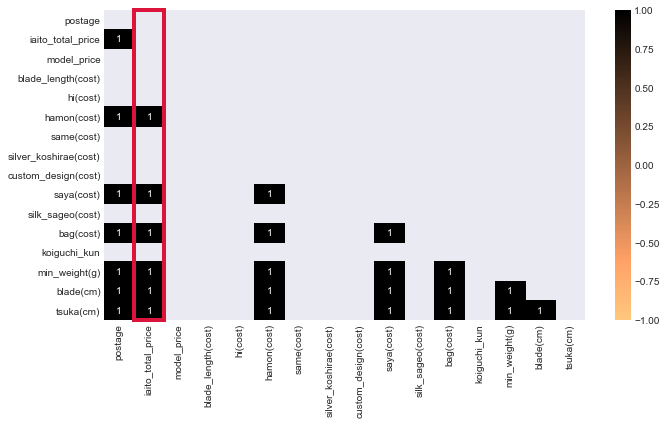

In [54]:
hmap(df_chuden_m,'copper_r','chuden_m')

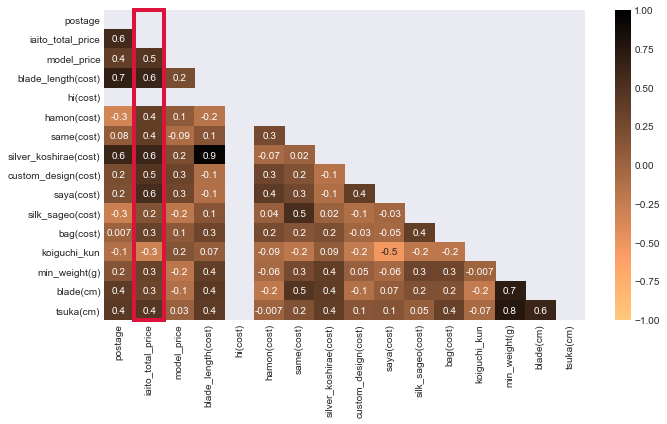

In [55]:
hmap(df_chuden_s,'copper_r','chuden_s')

Besides Chuden-S, we see generally limited variations in additional pricing components. This is due to the rather limited choice of fittings for Shoden and Chuden-M. In the case of Chuden-S, there are more variations. In particular, postage, silver koshirae and additional blade length are significant pricing components.

Silver koshirae is rather straightforward. Considered a 'luxury' option, they are an alternative to the default brass koshirae, and therefore command a price premium.

The postage is a surprise, as the pricing for postage should be relatively stable. We look into postage fees later.

Additional cost for blade length is likely attributed to longer than standard blade length; they should be quite rare, as seen in the swarmplot below.

In [56]:
df_stats.columns

Index(['postage', 'courier', 'model', 'iaito_total_price', 'model_price',
       'blade(shaku-sun-bu)', 'weight_(g)', 'blade_length(cost)', 'toushin',
       'hi', 'hi(cost)', 'hamon', 'hamon(cost)', 'habaki', 'tsuka_ito',
       'ito_color', 'tsuka(sun-bu)', 'ito_wrap', 'same', 'same(cost)',
       'menuki', 'fuchi_kashira', 'silver_koshirae(cost)', 'kojiri',
       'custom_design(cost)', 'tsuba', 'tsuba_weight(g)', 'saya', 'saya(cost)',
       'sageo', 'silk_sageo(cost)', 'bag(cost)', 'koiguchi_kun',
       'min_weight(g)', 'blade(cm)', 'tsuka(cm)'],
      dtype='object')

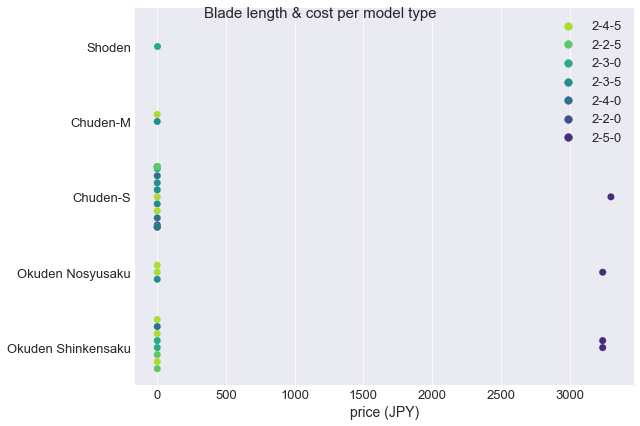

In [57]:
# where are the additional costs for blade length coming from?
df_length = df_stats[['blade(shaku-sun-bu)','blade_length(cost)','model']].copy()
df_length['model'] = df_length['model'].astype(mod_type)

ax = sns.catplot(y='model', x='blade_length(cost)', hue='blade(shaku-sun-bu)',
                 kind="swarm", data=df_length,height=6,aspect=1.5,s=7,legend=False,legend_out=False,
                 palette='viridis_r')

ax.fig.suptitle('Blade length & cost per model type', fontsize=ts)
ax.fig.subplots_adjust(left=0.01, top=0.93)
ax.set_xlabels('price (JPY)', fontsize=yls)
ax.set_ylabels('')
ax.set_xticklabels(fontsize=xts)
ax.set_yticklabels(fontsize=yts)
ax.add_legend(fontsize=ls)

plt.tight_layout()
plt.savefig('Length_xtra cost.png')
plt.show()

Only blade length of 2shaku-5sun and above require additional cost.

#### Okuden Nosyusaku & Okuden Shinkensaku

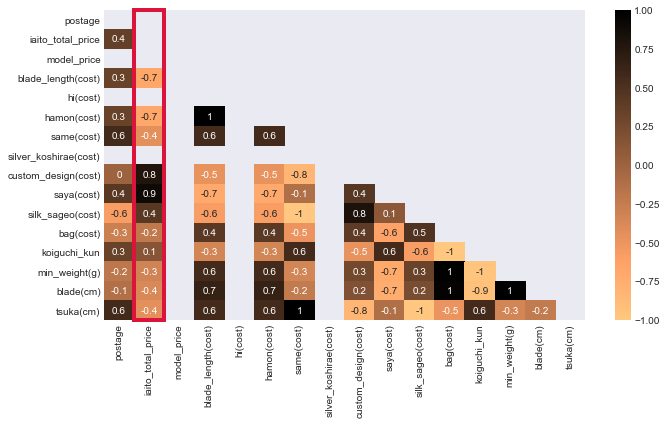

In [58]:
hmap(df_okuden_nosyusaku,'copper_r','oku_nosyu')

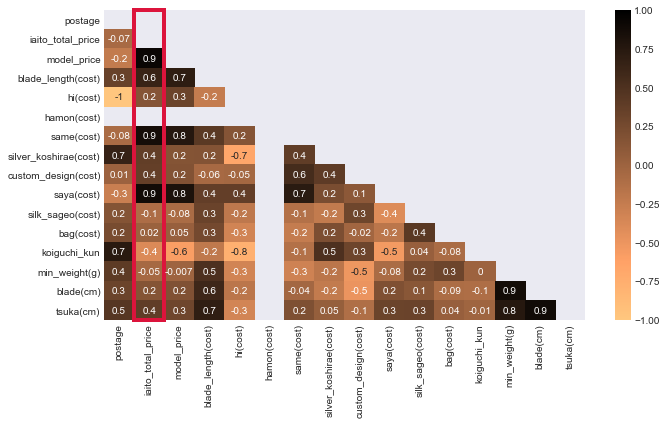

In [59]:
hmap(df_okuden_shinkensaku,'copper_r','oku_shin')

In the case of Okuden Nosyusaku, the significant pricing components come from saya charges (for fancier saya) and alternatives to koshirae. Typically these would be additional kojiri and tsuba finishes.
In the case of Okuden Shinkensaku, however, this is where things get interesting - blade length, saya charge, and same charges are the typically pricing components adding onto the overall iaito total price.

**Source of Price variants**

We know saya is one of the significant price drivers. What particular saya is the most expensive?

In [60]:
df_saya1 = df.copy()
df_saya1['model'] = df_saya1['model'].astype(mod_type)

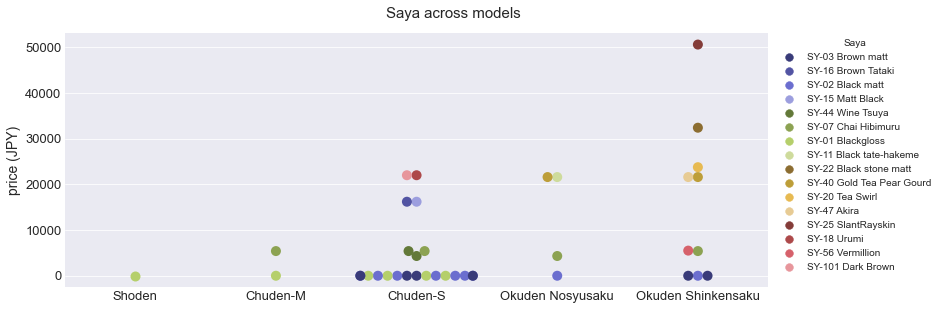

In [61]:
ax = sns.catplot(x="model", y="saya(cost)", data=df_saya1,
                 hue="saya", palette= 'tab20b', kind="swarm", s=10,
                 height=4.5, aspect=2.5)
ax.fig.suptitle('Saya across models',fontsize=ts)
ax.fig.subplots_adjust(left=0.1, top=0.9)
ax.set_xlabels('')
ax.set_ylabels('price (JPY)', fontsize=yls)
ax.set_xticklabels(fontsize=xts)
ax.set_yticklabels(fontsize=yts)
ax._legend.set_title('Saya')

plt.savefig('Saya types.png')
plt.show()

In [62]:
# An alternative to visualizing most expensive saya choices
# get a dedciated dataframe for this
df_saya2 = df[['saya','saya(cost)']].copy()
df_saya2 = df_saya2.sort_values(by=['saya(cost)'])

In [63]:
# remove those w/o additonal saya charge (i.e. saya_charge = 0)
df_saya2 = df_saya2[(df_saya2['saya(cost)']>0)]
df_saya2

,saya,saya(cost)
date,,
2016-12-01,SY-07 Chai Hibimuru,4320
2016-11-01,SY-44 Wine Tsuya,4320
2019-03-01,SY-07 Chai Hibimuru,5400
2018-09-01,SY-07 Chai Hibimuru,5400
2018-06-01,SY-07 Chai Hibimuru,5400
2018-09-01,SY-44 Wine Tsuya,5400
2020-08-30,SY-56 Vermillion,5500
2016-10-01,SY-15 Matt Black,16200
2014-11-01,SY-16 Brown Tataki,16200


* Duplicates in saya charge. Drop duplicates, keep last.

In [64]:
df_saya2 = df_saya2.drop_duplicates(subset=['saya'],keep='last')

In [65]:
list_temp = []
for i in range(0,len(df_saya2)):
    list_item = df_saya2['saya'][i] + ' (' +str(df_saya2['saya(cost)'][i]/1000) + 'k)'
    list_temp.append(list_item)
list_temp

['SY-07 Chai Hibimuru (5.4k)',
 'SY-44 Wine Tsuya (5.4k)',
 'SY-56 Vermillion (5.5k)',
 'SY-15 Matt Black (16.2k)',
 'SY-16 Brown Tataki (16.2k)',
 'SY-40 Gold Tea Pear Gourd (21.6k)',
 'SY-47 Akira (21.6k)',
 'SY-11 Black tate-hakeme  (21.6k)',
 'SY-18 Urumi (22.0k)',
 'SY-101 Dark Brown (22.0k)',
 'SY-20 Tea Swirl (23.76k)',
 'SY-22 Black stone matt (32.4k)',
 'SY-25 SlantRayskin (50.6k)']

In [66]:
df_saya2['saya_'] = list_temp

<ipython-input-66-21cedcb65096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saya2['saya_'] = list_temp


* Replicating saya color is not a good approach from experience; the saya colors don't translate well to print. Hence, use a sequential color scheme.

In [67]:
palette_saya = ['#7eedff','#6dd7ed','#5dc2dc','#4dadc9','#3e99b7','#3085a5','#217192','#125e7f','#004c6d',
               'slateblue','rebeccapurple','purple','indigo']

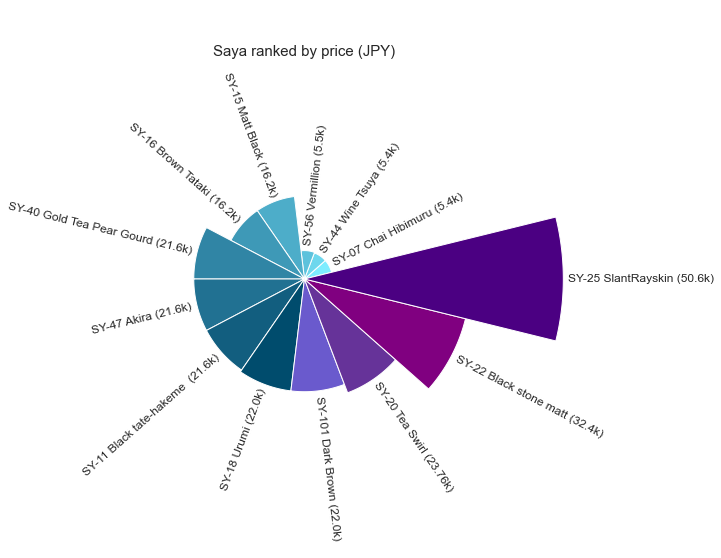

In [68]:
# initialize the figure
plt.figure(figsize=(12,10))
ax = plt.subplot(111, polar=True);
plt.axis('off')
plt.title('Saya ranked by price (JPY)',y=.9,fontsize=ts)

# set coordinate limits
upperlimit = 100
lowerlimit = 30

# compute max and min of dataset
max_ = df_saya2['saya(cost)'].max()
min_ = df_saya2['saya(cost)'].min()

# compute heights (conversion of saya_charge into new coordinates)
# 0 will be converted to lower limit (30)
# max_ converted to upper limit (100)
slope = (max_ - lowerlimit)/max_
heights = slope * df_saya2['saya(cost)'] + lowerlimit

# width of each bar
width = 2*np.pi / len(df_saya2.index)

# compute angle each bar is centered on
indexes = list(range(1, len(df_saya2.index)+1))
angles = [element * width for element in indexes]

# draw
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerlimit,
              linewidth=1,edgecolor="white",color=palette_saya)

# padding between bar and label
labelPadding = 1000

# label
for bar, angle, height, label in zip(bars,angles,heights,df_saya2['saya_']):
    # specify rotation in degrees
    rotation = np.rad2deg(angle)
    
    #flip some labels upside down for readability
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"
    
    # add label
    ax.text(x=angle, y=lowerlimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, rotation_mode="anchor",size=12)

plt.savefig('Saya.png')
plt.show()

* No doubt the saya choice (SY-25 (Slant Rayskin)) is the most expensive among the saya designs, for good reason. SY-25 can be considered a two-in-one design. The incorporation of rayskin requires part of the saya material to be removed so that the rayskin can be flushed with the rest of the saya surface. The remaining saya section is coated with dark green lacquer with specific twirl designs.

---

In [69]:
# what about Kojiri associated charges#1?
# get a dedciated dataframe for this
df_ko = df[['model','custom_design(cost)','kojiri']].copy()
df_ko['model'] = df_ko['model'].astype(mod_type)

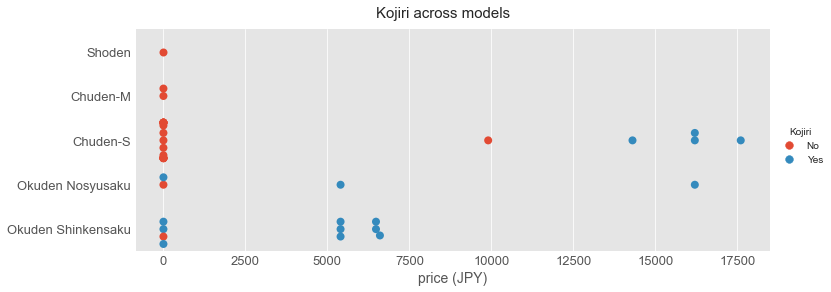

In [70]:
sns.set_palette(sns.color_palette('RdBu'))
plt.style.use('ggplot')
ax = sns.catplot(y='model', x='custom_design(cost)', data=df_ko,
                 hue="kojiri", kind="swarm", s=8,
                 height=4, aspect=2.5)
ax.fig.suptitle('Kojiri across models',fontsize=ts)
ax.fig.subplots_adjust(left=0.1, top=0.9)
ax.set_ylabels('')
ax.set_xlabels('price (JPY)', fontsize=yls)
ax.set_xticklabels(fontsize=xts)
ax.set_yticklabels(fontsize=yts)
ax._legend.set_title('Kojiri')

plt.savefig('Kojiri_model.png')
plt.show()

It is odd that kojiri charges would vary. Checking the field name, we are reminded that the data used refers to additional charges (inclusive of kojiri addition). In any case, we see kojiri generally preferred in higher end models. What is the additonal charges price distribution then? 

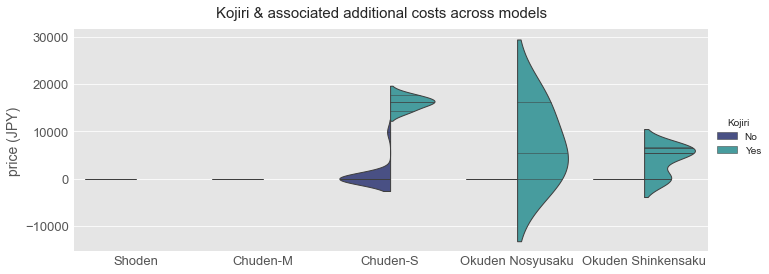

In [71]:
# what about Kojiri charges#2?
ax= sns.catplot(x="model", y="custom_design(cost)", data=df_ko, hue="kojiri", 
                kind="violin", split=True, inner="stick", palette="mako", linewidth=1,
                height=4,aspect=2.5)
ax.fig.suptitle('Kojiri & associated additional costs across models', fontsize=ts)
ax.fig.subplots_adjust(left=0.1, top=0.9)
ax.set_xlabels('')
ax.set_ylabels('price (JPY)', fontsize=yls)
ax.set_xticklabels(fontsize=xts)
ax.set_yticklabels(fontsize=yts)
ax._legend.set_title('Kojiri')

plt.savefig('Kojiri_model_violin.png')
plt.show()

* violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories" (e.g. in this case, Kojiri & No kojiri) across the various iaito models. In general, we can see that except for the Chuden-S model, people generally add on additional customization to the koshirae (fittings) in addition to the kojiri. 

* Here's where contextual knowledge regarding this siubject matter comes in handy. There are other aspects of additional charges from silver fittings, different finishing for tsuba that are currently organized as 'associated additional costs' along with kojiri cost. 

* To separate the aspect, it might be worthwhile to consider the number of datapoints and whether the effort justify the addiitonal insights. For now, we leave the data as-is.

In [72]:
x = np.arange(0,5)
x

array([0, 1, 2, 3, 4])

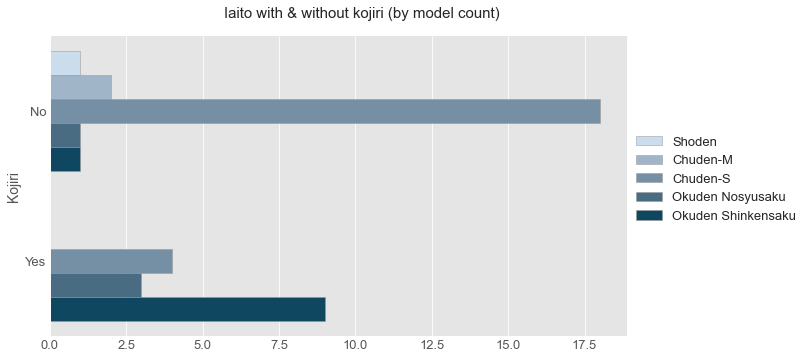

In [73]:
ax = sns.catplot(y="kojiri", data=df_ko,
                 kind="count", hue="model", 
                 palette=palette_box, edgecolor=".6",
                 height=5, aspect=2,legend=False)
ax.fig.suptitle('Iaito with & without kojiri (by model count)', fontsize=ts)
ax.fig.subplots_adjust(left=0.15, top=0.9)

label = np.arange(0,20)

ax.set_xlabels('')
ax.set_xticklabels(fontsize=xts)
ax.set_ylabels('Kojiri', fontsize=yls)
ax.set_yticklabels(fontsize=yts)
ax.add_legend(fontsize=ls)

plt.savefig('Kojiri_model_barh.png')
plt.show()

In [74]:
df['kojiri'].value_counts()

No     23
Yes    16
Name: kojiri, dtype: int64

A quick check on catalogue and website indicates Kojiri generally comes with additional cost for lower end models. For Okuden, some kojiri designs come with additional cost. It appears not many would want to go for kojiri. Or is it? 

In the first and third diagrams, it appears kojiri is favored in higher-end models (i.e. higher number with kojiris). 
The second diagram shows the distribution of the additional charges between kojiri/ no kojiri across the various models. From Chuden-S onwards, we can see that in addition to add-on for kojiri, prospective owners would include other customizations (with additional costs). 


In [75]:
# what does that mean in terms of total price per model?
df.groupby(['model'])['iaito_total_price'].mean()

model
Chuden-M               60630.000000
Chuden-S               83181.818182
Okuden Nosyusaku      106015.000000
Okuden Shinkensaku    153620.000000
Shoden                 40260.000000
Name: iaito_total_price, dtype: float64

In [76]:
df_stats.columns

Index(['postage', 'courier', 'model', 'iaito_total_price', 'model_price',
       'blade(shaku-sun-bu)', 'weight_(g)', 'blade_length(cost)', 'toushin',
       'hi', 'hi(cost)', 'hamon', 'hamon(cost)', 'habaki', 'tsuka_ito',
       'ito_color', 'tsuka(sun-bu)', 'ito_wrap', 'same', 'same(cost)',
       'menuki', 'fuchi_kashira', 'silver_koshirae(cost)', 'kojiri',
       'custom_design(cost)', 'tsuba', 'tsuba_weight(g)', 'saya', 'saya(cost)',
       'sageo', 'silk_sageo(cost)', 'bag(cost)', 'koiguchi_kun',
       'min_weight(g)', 'blade(cm)', 'tsuka(cm)'],
      dtype='object')

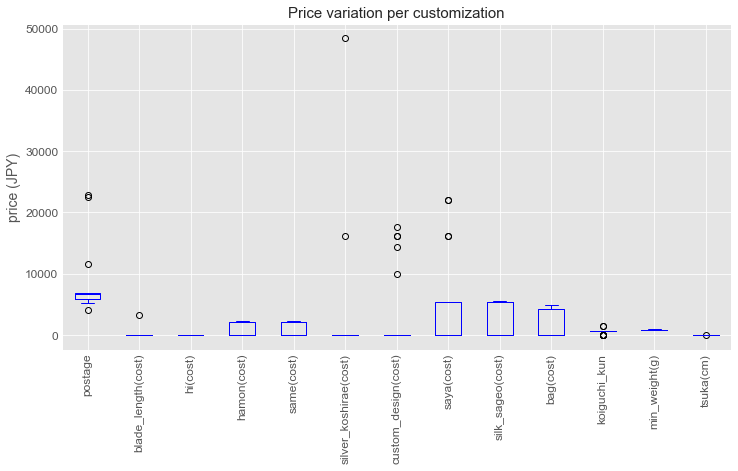

In [77]:
# What's the biggest price component w/o Okuden level models?
df4 = df_stats[df_stats['model'].str.contains('Okuden') == False].drop(['iaito_total_price','model_price',
                                                                        'blade(cm)'],axis=1)

fig,ax1 = plt.subplots(1,1,figsize=(12,6))
df4.boxplot(rot=90,color='blue',ax=ax1)
ax1.set_ylabel('price (JPY)',fontsize = yls)
ax1.set_xlabel('')
ax1.set_title('Price variation per customization', fontsize = ts)
ax1.tick_params(axis='x', labelsize='large', labelrotation=90 )
ax1.tick_params(axis='y', labelsize='large')

plt.savefig('Price variation_cust.png')
plt.show()

In [78]:
# if one were to try to link the model with addn cost options, what would that look like?
# get a customized dataframe for use
df_statsx = df_stats[['model',
                      'blade_length(cost)','hi(cost)','hamon(cost)','same(cost)',
                      'silver_koshirae(cost)','custom_design(cost)']].copy()

* Spaghetti plot (also known as a spaghetti chart, spaghetti diagram, or spaghetti model) enables viewing of data flows through systems. In this context, it nicely sums up all the major price components for each order across the respective iaito models. 

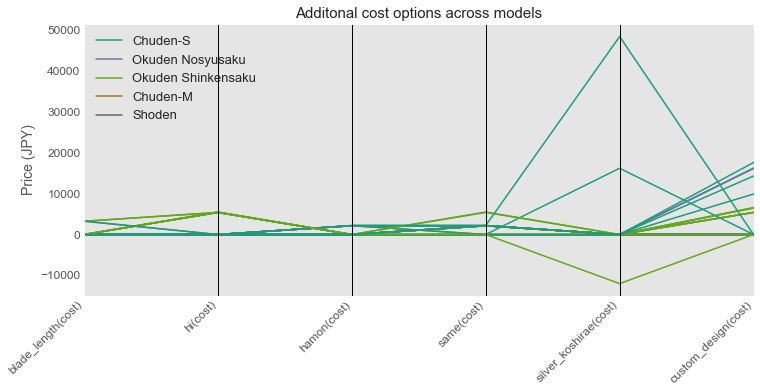

In [79]:
fig = plt.figure(figsize=(12,5))

pd.plotting.parallel_coordinates(df_statsx,'model',colormap='Dark2')
plt.title('Additonal cost options across models', fontsize=ts)
plt.ylabel('Price (JPY)', fontsize=yls)
plt.yticks(size=12)
plt.xticks(rotation=45,size=12,ha='right')
plt.legend(loc='upper left',fontsize=ls)

plt.savefig('spagetti_map.png')
plt.show()

**Postage over time**

In [80]:
df_postage = df[['postage','courier']].copy()
df_postage['courier'].value_counts()

FedEx    36
EMS       3
Name: courier, dtype: int64

In [81]:
df_postage.describe()

,postage
count,39.000000
mean,7091.717949
std,3925.676080
min,2300.000000
25%,6037.500000
50%,6700.000000
75%,6800.000000
max,22856.000000


* For such a large difference between the mean value and standard deviation in postage, possibilities could be that there have been a sharp increase in postage fees over time or the two couriers have very different postage fee.

In [82]:
df_fedex = df_postage[~(df_postage['courier']=='EMS')].copy()
df_ems = df_postage[(df_postage['courier']=='EMS')].copy()

In [83]:
df_ems.describe()

,postage
count,3.000000
mean,2883.333333
std,1010.362971
min,2300.000000
25%,2300.000000
50%,2300.000000
75%,3175.000000
max,4050.000000


In [84]:
df_fedex.describe()

,postage
count,36.000000
mean,7442.416667
std,3876.724121
min,5200.000000
25%,6100.000000
50%,6700.000000
75%,6800.000000
max,22856.000000


* Significant difference in price between FedEx and EMS (looking at the mean values). The default courier was FedEx. Looking back, EMS was used when FedEx services was unavailable. It's due to factors beyond our control (back then EMS was the only service available while FedEx prices surged from a combination of large delivery backlog and reduced operating flights. To expedite delivery, EMS was used.

* How have FedEx postage varied over time?

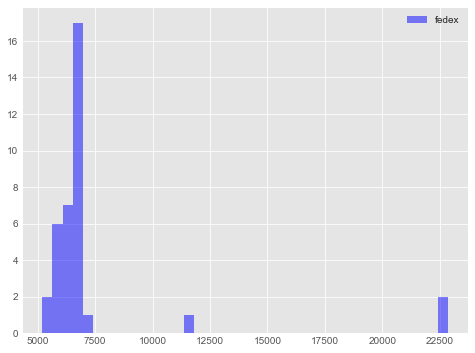

In [85]:
plt.figure(figsize=(8,6))
plt.hist(df_fedex['postage'],bins=40,alpha=0.5,label='fedex',color='blue')
plt.legend(loc='upper right')
plt.show()

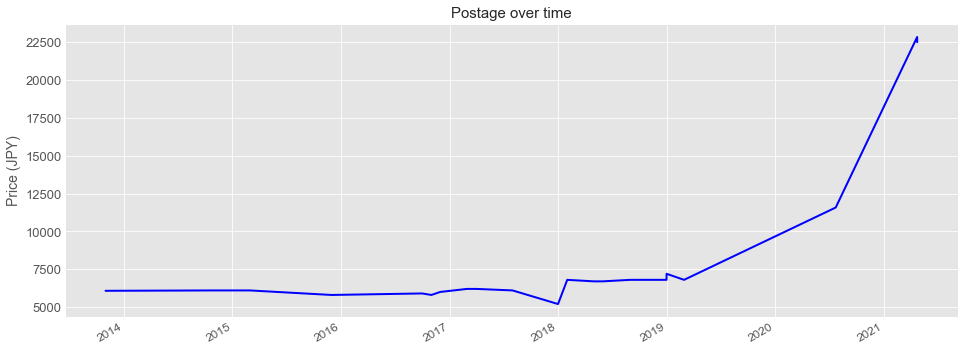

In [86]:
# Establish the size of the figure.
fig = plt.figure(figsize=(16, 6))

plt.plot(df_fedex['postage'], linewidth=2,color='blue')
plt.title('Postage over time',fontsize=ts)
plt.ylabel('Price (JPY)', fontsize=yls)
plt.yticks(size=yts)
plt.xticks(size=12)


# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()

plt.savefig('postage_trend.png')
plt.show()

---
### `Is there a particular koshirae that is a favourite among iaidokas?`

In [87]:
df.columns

Index(['nett', 'postage', 'courier', 'model', 'iaito_total_price',
       'model_price', 'blade(shaku-sun-bu)', 'weight_(g)',
       'blade_length(cost)', 'toushin', 'hi', 'hi(cost)', 'hamon',
       'hamon(cost)', 'habaki', 'tsuka_ito', 'ito_color', 'tsuka(sun-bu)',
       'ito_wrap', 'same', 'same(cost)', 'menuki', 'fuchi_kashira',
       'silver_koshirae(cost)', 'kojiri', 'custom_design(cost)', 'tsuba',
       'tsuba_weight(g)', 'saya', 'saya(cost)', 'sageo', 'silk_sageo(cost)',
       'bag(cost)', 'koiguchi_kun', 'min_weight(g)', 'blade(cm)', 'tsuka(cm)'],
      dtype='object')

In [88]:
df['tsuba'].value_counts().head(10)

T-44 Crescent Musashi           4
T-140 Phoenix                   3
T-95 Miyomoto Musashi           3
T-107 Tadatoki Toru             3
T-58 Kyogiku Toru               2
T-132 Pine and crane            2
T-118 Awa                       1
T-120 Karashishi (Silver)       1
T-49 Hideyoshi Kiri             1
T-124 Mai Dragonfly (Silver)    1
Name: tsuba, dtype: int64

In [89]:
df['fuchi_kashira'].value_counts().head(10)

KY-46 Musashi        3
KY-26 Higo Nami      2
KY-85 Chry Cloud     2
KY-119 Eagle pine    2
KY-124               2
KY-86                2
KY-29                1
KY-30                1
KS-126               1
KY-4 Dragon          1
Name: fuchi_kashira, dtype: int64

In [90]:
df['menuki'].value_counts().head(10)

MY-23 Phoenix           3
MY-94 Eagle pine        2
MY-40 Tiger Forest      2
MY-98 Wrap Dragon       2
MY-46 Phoenix branch    2
MY-104 Peony            1
MY-20                   1
MS-14                   1
MS-60 Phoenix           1
MS-38 Plum              1
Name: menuki, dtype: int64

Instances of 5 or more would indicate a particular favourite. Currently, it appears the T-44 Mikazuki Musashi tsuba could be a favourite, but it remains to be seen.

In [91]:
df['tsuka_ito'].value_counts().head(10)

Silk                      32
Cotton                     3
Leather                    1
(Atukuchi usuba) Thick     1
Deer (front)               1
Pig Skin                   1
Name: tsuka_ito, dtype: int64

Silk wrapping is a hot favourite for obvious reasons. It is easier on the hands compared to cotton, and stands up well in tropical climate.

In [92]:
# Hamon choice by models
df.loc[df['hamon'].str.contains('Single'), 'single_hamon'] = 'single_hamon' 
df.loc[df['hamon'].str.contains('Double'), 'single_hamon'] = 'double_hamon' 

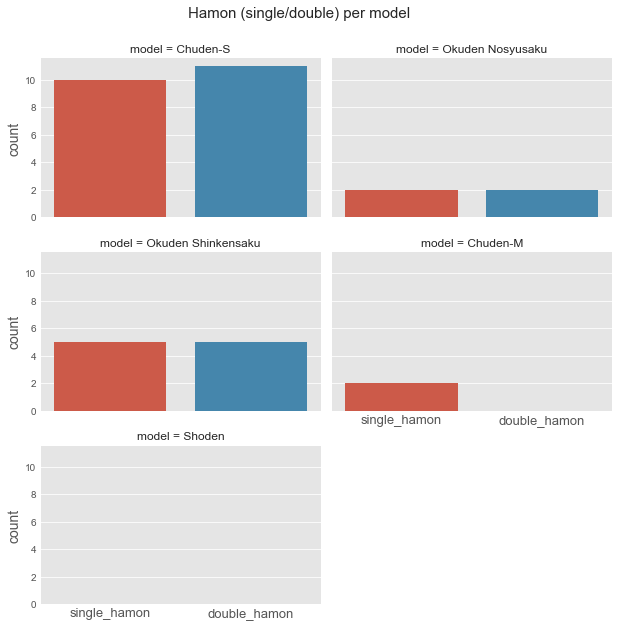

In [93]:
ax1 = sns.catplot(x="single_hamon", 
            col="model", 
            col_wrap=2, 
            data=df, 
            kind="count", 
            height=3, 
            aspect=1.5);

ax1.set_xlabels('')
ax1.set_xticklabels(fontsize=xts)
ax1.set_ylabels('count', fontsize=yls)
ax1.fig.suptitle('Hamon (single/double) per model', fontsize=ts)
ax1.fig.subplots_adjust(left=0.1, top=.9)

plt.savefig('hamon per model.png')
plt.show()

Surprisingly, single and double hamon choice are both equally popular!

---

In [94]:
df_temp = df[['model']].copy()

In [95]:
# extract year from date index
df_temp['year'] = pd.DatetimeIndex(df_temp.index).year

In [96]:
df_temp

,model,year
date,,
2013-11-01,Chuden-S,2013
2014-11-01,Chuden-S,2014
2015-03-01,Chuden-S,2015
2015-12-01,Chuden-S,2015
2016-10-01,Chuden-S,2016
2016-11-01,Chuden-S,2016
2016-11-01,Chuden-S,2016
2016-12-01,Okuden Nosyusaku,2016
2017-03-01,Chuden-S,2017


In [97]:
df_x = df_temp.groupby(['year','model'])['model'].count().to_frame()
df_x.rename(columns={'model':'count'},inplace=True)

In [98]:
df_cumsum = df_x.groupby(['model','year']).sum().groupby(level=0).cumsum().reset_index()
df_cumsum

,model,year,count
0,Chuden-M,2017,1
1,Chuden-M,2018,2
2,Chuden-S,2013,1
3,Chuden-S,2014,2
4,Chuden-S,2015,4
5,Chuden-S,2016,7
6,Chuden-S,2017,8
7,Chuden-S,2018,18
8,Chuden-S,2020,20
9,Chuden-S,2021,22


* From the table, we can infer the gradual increase in the various models over the years (duh). Let's see how a bar chart and stackplot measure up respectively.

In [99]:
palette_box

['#c6ddf1', '#99b6ce', '#6d91ad', '#416e8c', '#004c6d']

In [100]:
# Setting the data
years = [2013,2014,2015,2016,2017,2018,2019,2020,2021]
Sho = [0,0,0,0,0,0,1,1,1]
Chu_M = [0,0,0,0,1,2,2,2,2]
Chu_S = [1,2,4,7,8,18,18,20,22]
Oku_Nosyu = [0,0,0,1,1,3,4,4,4]
Oku_Shin = [0,0,0,0,3,4,8,10,10]

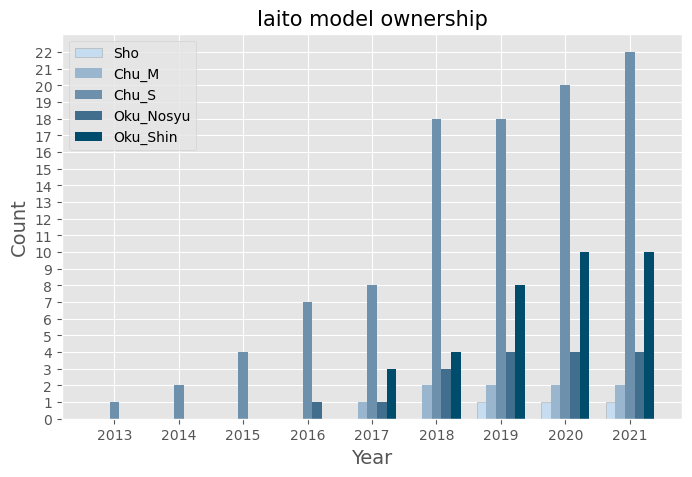

In [101]:
width=0.15
years_index = np.arange(len(years))
# clear reset plt style
plt.style.use('default')
plt.style.use(['ggplot'])
plt.figure(figsize=(8,5))

# plt interface approach for bar charts
plt.bar(years_index-2*width, Sho, color='#c6ddf1', label='Sho', width=width, linewidth=0.4,edgecolor='darkgrey')

plt.bar(years_index-width, Chu_M, color='#99b6ce', label='Chu_M', width=width)

plt.bar(years_index, Chu_S, color='#6d91ad', label='Chu_S', width=width)

plt.bar(years_index+width, Oku_Nosyu, color='#416e8c', label='Oku_Nosyu', width=width)

plt.bar(years_index+2*width, Oku_Shin, color='#004c6d', label='Oku_Shin', width=width)

plt.legend()

plt.title('Iaito model ownership',fontsize=ts)
plt.xlabel('Year',fontsize=xls)
plt.xticks(ticks=years_index, labels=years)
plt.ylabel('Count',fontsize=yls)
plt.yticks(list(np.arange(df_cumsum['count'].max()+1)))

plt.savefig('iaito_ownership.png')
plt.show()

* Charting this provides an interesting perspective to the dojo journey. From year 2013, the ownership of intermediate model, the Chuden, slowly grew. From year 2015 onwards, the dojo saw an increase in members and iaito orders. The year 2018 has the largest increase in iaito orders. This is due to new members and some of the current members purchasing new iaitos. It is also from here on that some of the members moved on to more advanced models.

* However, one technically cannot use this to derive dojo membership. Remember that causation is not the same as correlation.

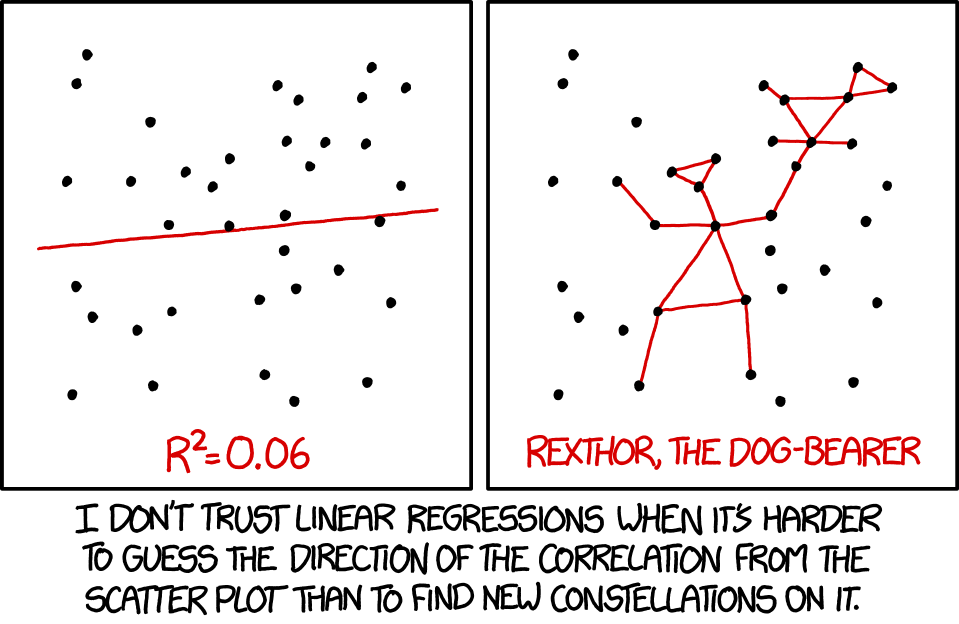

* Now to try out something for fun. xkcd style can be called from matplotlib. We chart two prior figures to check it out.

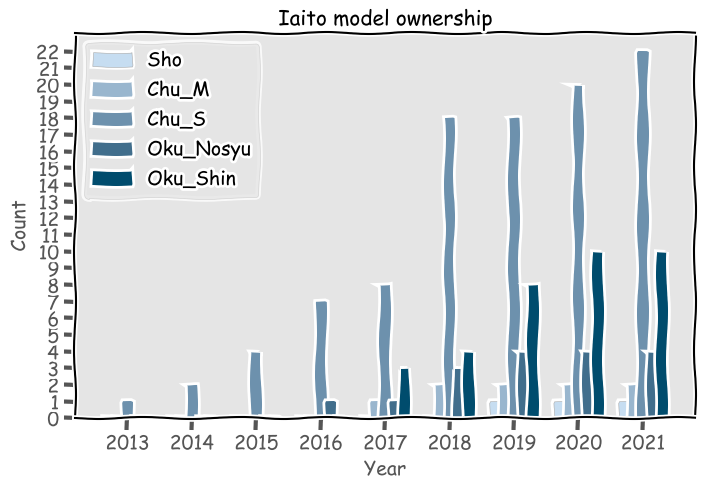

In [102]:
plt.xkcd()
plt.figure(figsize=(8,5))

plt.bar(years_index-2*width, Sho, color='#c6ddf1', label='Sho', width=width, linewidth=0.4,edgecolor='darkgrey')

plt.bar(years_index-width, Chu_M, color='#99b6ce', label='Chu_M', width=width)

plt.bar(years_index, Chu_S, color='#6d91ad', label='Chu_S', width=width)

plt.bar(years_index+width, Oku_Nosyu, color='#416e8c', label='Oku_Nosyu', width=width)

plt.bar(years_index+2*width, Oku_Shin, color='#004c6d', label='Oku_Shin', width=width)

plt.legend()

plt.title('Iaito model ownership',fontsize=ts)
plt.xlabel('Year',fontsize=xls)
plt.xticks(ticks=years_index, labels=years)
plt.ylabel('Count',fontsize=yls)
plt.yticks(list(np.arange(df_cumsum['count'].max()+1)))

plt.savefig('iaito_xkcd.png')
plt.show()

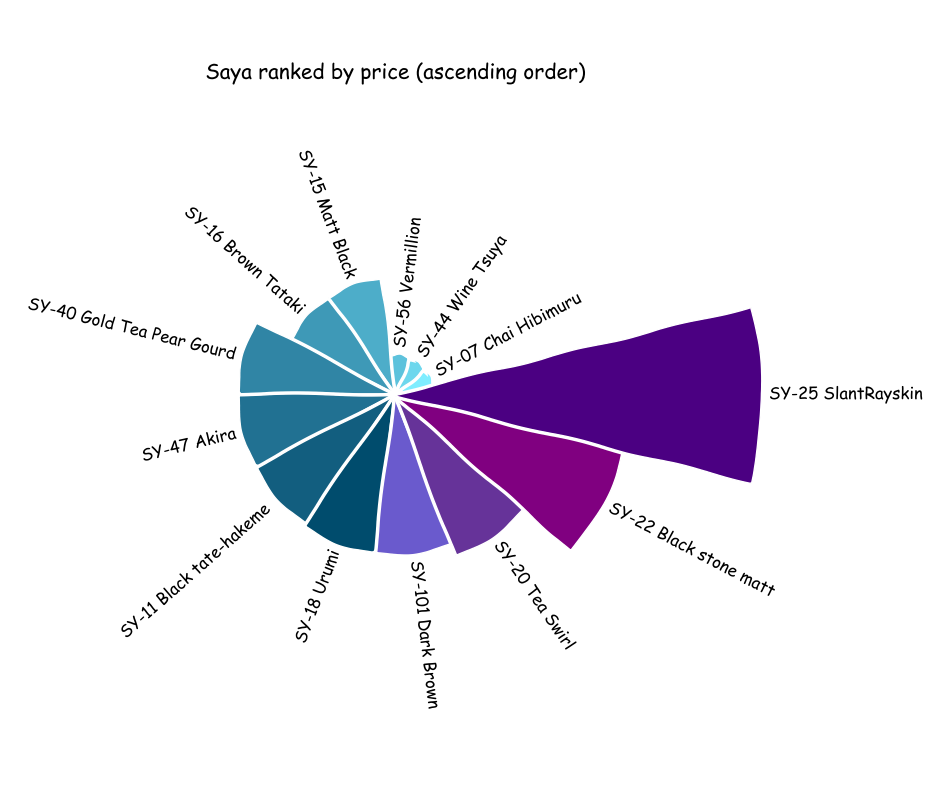

In [103]:
plt.xkcd()
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True);
plt.axis('off')
plt.title('Saya ranked by price (ascending order)',y=.9,fontsize=ts)

# set coordinate limits
upperlimit = 100
lowerlimit = 30

# compute max and min of dataset
max_ = df_saya2['saya(cost)'].max()
min_ = df_saya2['saya(cost)'].min()

# compute heights (conversion of saya_charge into new coordinates)
# 0 will be converted to lower limit (30)
# max_ converted to upper limit (100)
slope = (max_ - lowerlimit)/max_
heights = slope * df_saya2['saya(cost)'] + lowerlimit

# width of each bar
width = 2*np.pi / len(df_saya2.index)

# compute angle each bar is centered on
indexes = list(range(1, len(df_saya2.index)+1))
angles = [element * width for element in indexes]

# draw
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerlimit,
              linewidth=1,edgecolor="white",color=palette_saya)

# padding between bar and label
labelPadding = 1000

# label
for bar, angle, height, label in zip(bars,angles,heights,df_saya2['saya']):
    # specify rotation in degrees
    rotation = np.rad2deg(angle)
    
    #flip some labels upside down for readability
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"
    
    # add label
    ax.text(x=angle, y=lowerlimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, rotation_mode="anchor",size=12)

plt.savefig('Saya_xkcd.png')
plt.show()

---

### One more classic xkcd plot

In [104]:
df_fedex.reset_index(drop=False, inplace=True)

In [105]:
df_fedex.tail(10)

,date,postage,courier
26,2018-09-01,6800,FedEx
27,2019-01-01,6800,FedEx
28,2019-01-01,7200,FedEx
29,2019-03-01,6800,FedEx
30,2019-03-01,6800,FedEx
31,2019-03-01,6800,FedEx
32,2019-03-01,6800,FedEx
33,2020-07-23,11580,FedEx
34,2021-04-23,22856,FedEx
35,2021-04-23,22516,FedEx


In [106]:
df_fedex['date'][df_fedex.index[-1]]

Timestamp('2021-04-23 00:00:00')

In [107]:
df_fedex['date'][0]

Timestamp('2013-11-01 00:00:00')

In [108]:
# create a dataframe for 2019-11-01
data = {'date': ['2019-11-01','2017-01-01'], 
        'value': [22600,17500]}
df_dt = pd.DataFrame(data, columns = ['date', 'value'])
df_dt['date'] = pd.to_datetime(df_dt['date'])

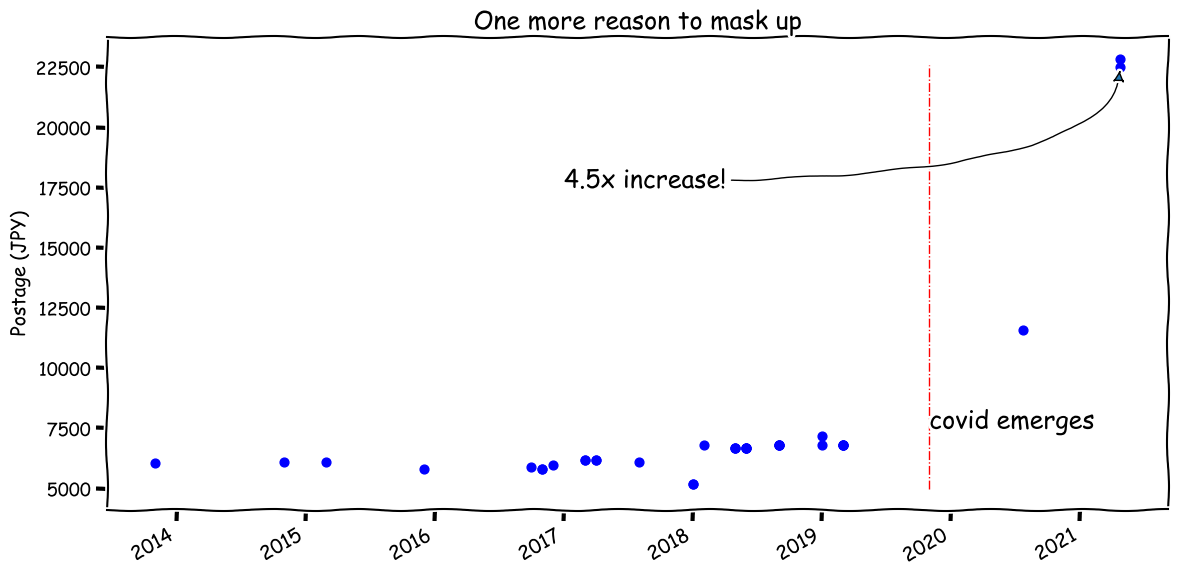

In [109]:
# Create the postage chart in xkcd style
plt.style.use('default')
plt.xkcd()

# create yticks for labeling
yticks = np.arange(5000,25000,2500)

# Establish the size of the figure.
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot()
# Scatter plot
ax.scatter(df_fedex['date'],df_fedex['postage'], s=40,color='blue')
# vertical line
ax.vlines(df_dt['date'][0],5000,df_dt['value'][0],linestyle='-.',linewidth=1,color='r')

# annotate
ax.text(df_dt['date'][0],7500,'covid emerges',fontsize=18)
ax.annotate('4.5x increase!', fontsize=18,
            xy=(df_fedex['date'][df_fedex.index[-1]],22516), 
            xytext=(df_dt['date'][1],17500),
            arrowprops=dict(arrowstyle='-|>',
                           connectionstyle='angle3,angleA=0,angleB=-90')
           )

# Title & labels
ax.set_title('One more reason to mask up',fontsize=18)
ax.set_ylabel('Postage (JPY)', fontsize=yls)
ax.set_yticks(ticks=yticks)
ax.set_yticklabels(labels=yticks,size=yts)
plt.xticks(size=14)

# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('postage_trend_xkcd.png')
plt.show()

___

* Back to serious business. Matplotlib was developed initially for two-dimensional plotting. Overtime, its capabilities has extended to offer three-dimensional plotting modules.

In [110]:
df.columns

Index(['nett', 'postage', 'courier', 'model', 'iaito_total_price',
       'model_price', 'blade(shaku-sun-bu)', 'weight_(g)',
       'blade_length(cost)', 'toushin', 'hi', 'hi(cost)', 'hamon',
       'hamon(cost)', 'habaki', 'tsuka_ito', 'ito_color', 'tsuka(sun-bu)',
       'ito_wrap', 'same', 'same(cost)', 'menuki', 'fuchi_kashira',
       'silver_koshirae(cost)', 'kojiri', 'custom_design(cost)', 'tsuba',
       'tsuba_weight(g)', 'saya', 'saya(cost)', 'sageo', 'silk_sageo(cost)',
       'bag(cost)', 'koiguchi_kun', 'min_weight(g)', 'blade(cm)', 'tsuka(cm)',
       'single_hamon'],
      dtype='object')

In [111]:
df3d = pd.read_excel('project_nanato2021.xlsx', sheet_name='cleaned_data',
                    usecols=['toushin','min_weight(g)','blade(cm)','tsuka(cm)',])

In [112]:
df3d.columns

Index(['toushin', 'min_weight(g)', 'blade(cm)', 'tsuka(cm)'], dtype='object')

In [113]:
df3d.toushin.value_counts()

(Atukuchi usuba) Thick    28
(Usukuchi) Thin           11
Name: toushin, dtype: int64

In [114]:
w = list(i for i in df3d['min_weight(g)'])
b = list(j for j in df3d['blade(cm)'])
t = list(k for k in df3d['tsuka(cm)'])
labels = ['(Atukuchi usuba) Thick', '(Usukuchi) Thin']

In [115]:
# import library
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

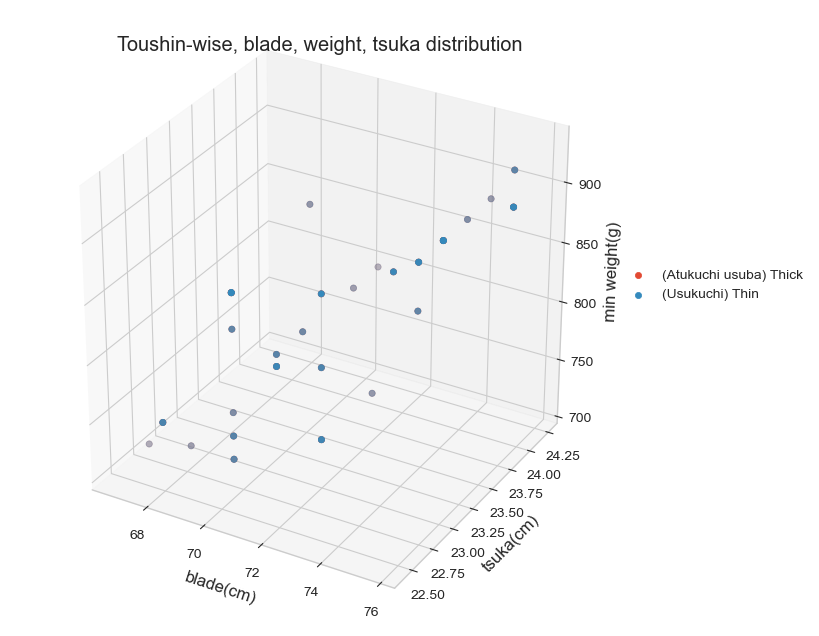

In [116]:
plt.style.use('default')
plt.style.use(['ggplot','seaborn-whitegrid'])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for l in labels:   
    ax.scatter(b,t,w,label=l)

ax.set_title('Toushin-wise, blade, weight, tsuka distribution')
ax.set_xlabel('blade(cm)')
ax.set_ylabel('tsuka(cm)')
ax.set_zlabel('min weight(g)')
ax.legend(bbox_to_anchor=(1.3, 0.6))
plt.show()

---